In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist 

Using TensorFlow backend.


In [2]:
!pip install PTable
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["model_name", "Test Accuracy", "Description"]

In [0]:
def plt_epoch_vs_loss(epochs, val_loss, train_loss, axis):
    axis.plot(epochs, val_loss, 'b', label="Validation Loss")
    axis.plot(epochs, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print("Number of train examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of train examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


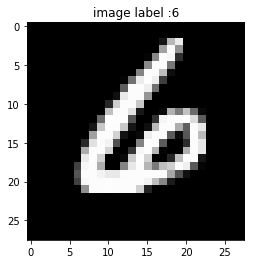

In [6]:
#displaying random image and label
plt.imshow(X_train[2345], cmap='gray')
plt.title("image label :"+str(y_train[2345]))
plt.show()

In [0]:
#reshaping x_train and x_test tensor for input in model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
#converting class numbers in 10 dimensional vector
Y_train = keras.utils.np_utils.to_categorical(y_train, 10) 
Y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [8]:
from keras.models import Sequential
model_3layer = Sequential()
model_3layer.add(keras.layers.Conv2D(filters=3,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_3layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=3,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
model_3layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=3,kernel_size=(2,2),kernel_initializer='he_normal',activation='relu'))
model_3layer.add(keras.layers.Flatten())
model_3layer.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
model_3layer.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model_3layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 30s 494us/step - loss: 1.8876 - acc: 0.4013 - val_loss: 1.4419 - val_acc: 0.4992
Epoch 2/10
60000/60000 [==============================] - 29s 491us/step - loss: 1.1926 - acc: 0.6024 - val_loss: 0.7421 - val_acc: 0.7670
Epoch 3/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.5447 - acc: 0.8271 - val_loss: 0.3669 - val_acc: 0.8845
Epoch 4/10
60000/60000 [==============================] - 30s 498us/step - loss: 0.3250 - acc: 0.8956 - val_loss: 0.2769 - val_acc: 0.9103
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.2434 - acc: 0.9229 - val_loss: 0.2120 - val_acc: 0.9319
Epoch 6/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.2009 - acc: 0.9360 - val_loss: 0.1829 - val_acc: 0.9413
Epoch 7/10
6

Test score: 0.13773354607648217
Test accuracy: 0.9567


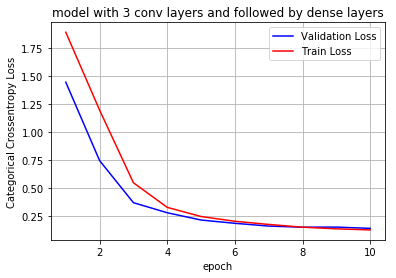

In [10]:
score = model_3layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 3 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), history.history['val_loss'], history.history['loss'], axis)
table.add_row(["model_3convlayer",score[1],"kernel-5X5X3(relu, he_normal),\n maxpool-(2,2),\n \
kernel-3X3X3(relu, he_normal),\n maxpool-(2,2),\n \
kernel-2X2X3(relu, he_normal),\n \
flatten,\n Dense-128(relu, he_normal),\n softmax-10"])

In [11]:
from keras.models import Sequential
model_3layer = Sequential()
model_3layer.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_3layer.add(keras.layers.BatchNormalization())
model_3layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
model_3layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=32,kernel_size=(2,2),kernel_initializer='he_normal',activation='relu'))
model_3layer.add(keras.layers.BatchNormalization())
model_3layer.add(keras.layers.Flatten())
model_3layer.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
model_3layer.add(keras.layers.Dropout(0.4))
model_3layer.add(keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'))
model_3layer.add(keras.layers.Dropout(0.2))
model_3layer.add(keras.layers.Dense(10,activation='softmax'))

model_3layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.3532 - acc: 0.8912 - val_loss: 0.0775 - val_acc: 0.9744
Epoch 2/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.1150 - acc: 0.9670 - val_loss: 0.0585 - val_acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.0817 - acc: 0.9767 - val_loss: 0.0496 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.0661 - acc: 0.9807 - val_loss: 0.0408 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0541 - acc: 0.9840 - val_loss: 0.0411 - val_acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0477 - acc: 0.9863 - val_loss: 0.0370 - val_acc: 0.9896

Test score: 0.04403250717676419
Test accuracy: 0.9882


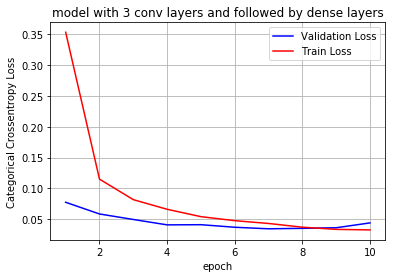

In [12]:
score = model_3layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 3 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), history.history['val_loss'], history.history['loss'], axis)
table.add_row(["model_3convlayer",score[1],"kernel-5X5X8(padding-same, relu, he_normal),\n BatchNormalization(),\n maxpool-(2,2),\n \
kernel-3X3X16(relu, he_normal),\n maxpool-(2,2),\n \
kernel-2X2X32(relu, he_normal),\n BatchNormalization,\n \
flatten,\n  Dense-128,\n Dropout-0.4,\n Dense-64,\n Dropout-0.2,\n softmax-10"])

In [13]:
model_3layer = Sequential()
model_3layer.add(keras.layers.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_3layer.add(keras.layers.AvgPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),kernel_initializer='he_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model_3layer.add(keras.layers.AvgPool2D(pool_size=(2,2)))
model_3layer.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)))
model_3layer.add(keras.layers.Flatten())
model_3layer.add(keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.1)))
model_3layer.add(keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'))
model_3layer.add(keras.layers.Dropout(0.2))
model_3layer.add(keras.layers.Dense(10,activation='softmax'))

model_3layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 83s 1ms/step - loss: 134.6556 - acc: 0.4565 - val_loss: 5.6330 - val_acc: 0.8404
Epoch 2/10
60000/60000 [==============================] - 84s 1ms/step - loss: 4.9399 - acc: 0.8881 - val_loss: 4.3817 - val_acc: 0.9405
Epoch 3/10
60000/60000 [==============================] - 83s 1ms/step - loss: 4.2612 - acc: 0.9411 - val_loss: 3.8829 - val_acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 84s 1ms/step - loss: 3.9666 - acc: 0.9543 - val_loss: 3.7690 - val_acc: 0.9718
Epoch 5/10
60000/60000 [==============================] - 84s 1ms/step - loss: 3.8215 - acc: 0.9603 - val_loss: 3.7516 - val_acc: 0.9740
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 3.6997 - acc: 0.9634 - val_loss: 3.5454 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 84s 1ms/step - loss: 3.6314 - acc: 0.9672 - val_loss: 3.5636 - val_

Test score: 3.3998314212799072
Test accuracy: 0.9812


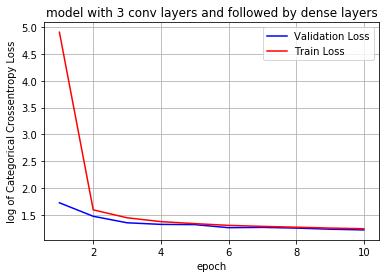

In [20]:
score = model_3layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 3 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('log of Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), np.log(history.history['val_loss']), np.log(history.history['loss']), axis)
table.add_row(["model_3convlayer",score[1],"kernel-7X7X32(padding-same, relu, he_normal),\n AvgPool-(2,2),\n \
kernel-5X5X8(relu, he_normal, L2_regularizer(0.001)),\n AvgPool-(2,2),\n \
kernel-3X3X64(relu, he_normal, L2_regularizer(0.0001)),\n \
flatten,\n  Dense-512(relu, he_normal, L1_regularizer(0.1)),\n Dense-32(relu, he_normal),\n Dropout-0.2,\n softmax-10"])

In [21]:
from keras.models import Sequential
model_5layer = Sequential()
model_5layer.add(keras.layers.Conv2D(filters=8,kernel_size=(7,7),strides=(1,1),padding='same',activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5), strides=(2,2), padding='same', activation='relu', kernel_initializer='he_normal'))
model_5layer.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3), kernel_initializer='he_normal', activation='relu'))
model_5layer.add(keras.layers.AvgPool2D(pool_size=(2,2)))
model_5layer.add(keras.layers.Conv2D(filters=64,kernel_size=(1,1), kernel_initializer='he_normal', activation='relu'))
model_5layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_5layer.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Flatten())
model_5layer.add(keras.layers.Dense(128, activation='sigmoid',kernel_initializer=keras.initializers.RandomNormal()))
model_5layer.add(keras.layers.Dropout(0.5))
model_5layer.add(keras.layers.Dense(64, activation='tanh',kernel_initializer='glorot_normal'))
model_5layer.add(keras.layers.Dense(10,activation='softmax'))

model_5layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.3387 - acc: 0.9091 - val_loss: 0.0608 - val_acc: 0.9806
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0644 - acc: 0.9824 - val_loss: 0.1014 - val_acc: 0.9706
Epoch 3/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0494 - acc: 0.9859 - val_loss: 0.0507 - val_acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0381 - val_acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0355 - acc: 0.9898 - val_loss: 0.0514 - val_acc: 0.9838
Epoch 6/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0299 - acc: 0.9912 - val_loss: 0.0337 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0435 - val_ac

Test score: 0.03454381320771354
Test accuracy: 0.9891


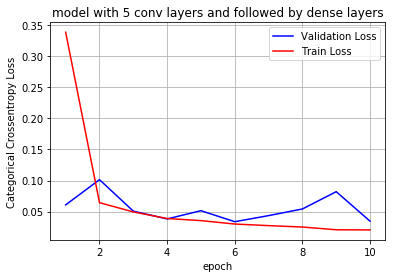

In [22]:
score = model_5layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 5 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), history.history['val_loss'], history.history['loss'], axis)
table.add_row(["model_5convlayer",score[1],"kernel-7X7X8(padding-same, relu, he_normal),\n BatchNormalization(),\n \
kernel-5X5X16(stride=(2,2), padding-same, relu, he_normal),\n \
kernel-3X3X32(relu, he_normal),\n AvgPool-(2,2),\n \
kernel-1X1X64(relu, he_normal),\n MaxPool-(2,2),\n \
kernel-3X3X128(relu, he_normal),\n BatchNormalization(),\n \
flatten,\n  Dense-128(sigmoid, random_normal),\n Dropout-0.5,\n Dense-64(tanh, glorot_normal),\n softmax-10"])

In [23]:
model_5layer = Sequential()
model_5layer.add(keras.layers.Conv2D(filters=8,kernel_size=(11,11),strides=(2,2),padding='same',activation='sigmoid',kernel_initializer='glorot_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Conv2D(filters=16,kernel_size=(7,7), strides=(3,3), padding='same', activation='tanh', kernel_initializer='glorot_normal'))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Conv2D(filters=32,kernel_size=(5,5), kernel_initializer='glorot_normal', activation='sigmoid'))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Conv2D(filters=64,kernel_size=(1,1), kernel_initializer='glorot_normal', activation='sigmoid'))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Conv2D(filters=128,kernel_size=(1,1),kernel_initializer='glorot_normal',activation='sigmoid'))
model_5layer.add(keras.layers.BatchNormalization())
model_5layer.add(keras.layers.Flatten())
model_5layer.add(keras.layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.3),kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.1)))
model_5layer.add(keras.layers.Dense(32, activation='relu',kernel_initializer='he_normal'))
model_5layer.add(keras.layers.Dense(10,activation='softmax'))

model_5layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 612us/step - loss: 110.9730 - acc: 0.9134 - val_loss: 1.5035 - val_acc: 0.9580
Epoch 2/10
60000/60000 [==============================] - 35s 584us/step - loss: 1.3051 - acc: 0.9633 - val_loss: 1.1942 - val_acc: 0.9679
Epoch 3/10
60000/60000 [==============================] - 36s 593us/step - loss: 1.1374 - acc: 0.9708 - val_loss: 1.0935 - val_acc: 0.9696
Epoch 4/10
60000/60000 [==============================] - 36s 596us/step - loss: 1.0653 - acc: 0.9754 - val_loss: 1.0569 - val_acc: 0.9733
Epoch 5/10
60000/60000 [==============================] - 36s 598us/step - loss: 1.0273 - acc: 0.9788 - val_loss: 1.0323 - val_acc: 0.9721
Epoch 6/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.9978 - acc: 0.9802 - val_loss: 0.9983 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 35s 581us/step - loss: 0.9895 - acc: 0.9800 - val_loss: 

Test score: 0.9983397294044495
Test accuracy: 0.9735


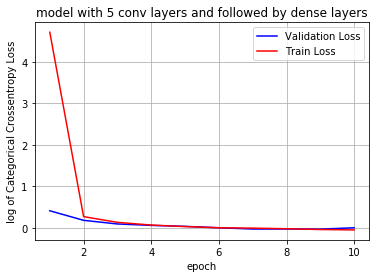

In [24]:
score = model_5layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 5 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('log of Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), np.log(history.history['val_loss']), np.log(history.history['loss']), axis)
table.add_row(["model_5convlayer",score[1],"kernel-11X11X8(strides-(2,2), padding-same, sigmoid, glorot_normal),\n BatchNormalization(),\n \
kernel-7X7X16(stride=(3,3), padding-same, tanh, glorot_normal),\n BatchNormalization(),\n \
kernel-5X5X32(sigmoid, glorot_normal),\n BatchNormalization(),\n \
kernel-1X1X64(sigmoid, glorot_normal),\n BatchNormalization(),\n \
kernel-1X1X128(sigmoid, glorot_normal),\n BatchNormalization(),\n \
flatten,\n  Dense-512(LeakyRelu(alpha=0.3), he_normal, L1_regularizer(0.1)),\n Dense-32(relu, he_normal),\n softmax-10"])

In [25]:
model_7layer = Sequential()
model_7layer.add(keras.layers.Conv2D(filters=4,kernel_size=(7,7),strides=(2,2),padding='same',activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),padding='same',kernel_initializer='he_normal',activation='relu'))
model_7layer.add(keras.layers.AvgPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal', activation='relu'))
model_7layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=128,kernel_size=(1,1),padding='same',kernel_initializer='glorot_normal', activation='sigmoid'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Conv2D(filters=256,kernel_size=(1,1),padding='same',kernel_initializer='glorot_normal',activation='sigmoid'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Flatten())
model_7layer.add(keras.layers.Dense(512, activation=keras.layers.LeakyReLU(alpha=0.3),kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.1)))
model_7layer.add(keras.layers.Dropout(0.5))
model_7layer.add(keras.layers.Dense(128, activation='tanh',kernel_initializer='glorot_normal'))
model_7layer.add(keras.layers.Dropout(0.5))
model_7layer.add(keras.layers.Dense(10,activation='softmax'))

model_7layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_7layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 658us/step - loss: 114.3326 - acc: 0.8124 - val_loss: 2.5967 - val_acc: 0.9369
Epoch 2/10
60000/60000 [==============================] - 37s 618us/step - loss: 2.5513 - acc: 0.9288 - val_loss: 2.4331 - val_acc: 0.9416
Epoch 3/10
60000/60000 [==============================] - 37s 613us/step - loss: 2.3752 - acc: 0.9521 - val_loss: 2.3065 - val_acc: 0.9691
Epoch 4/10
60000/60000 [==============================] - 37s 613us/step - loss: 2.3214 - acc: 0.9614 - val_loss: 2.4855 - val_acc: 0.9742
Epoch 5/10
60000/60000 [==============================] - 36s 606us/step - loss: 2.2267 - acc: 0.9671 - val_loss: 2.2931 - val_acc: 0.9718
Epoch 6/10
60000/60000 [==============================] - 36s 607us/step - loss: 2.1223 - acc: 0.9729 - val_loss: 2.0710 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 37s 622us/step - loss: 2.0574 - acc: 0.9772 - val_loss: 

Test score: 2.0750079093933107
Test accuracy: 0.9734


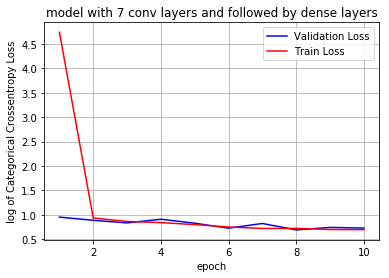

In [26]:
score = model_7layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 7 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('log of Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), np.log(history.history['val_loss']), np.log(history.history['loss']), axis)
table.add_row(["model_7convlayer",score[1],"kernel-7X7X4(strides-(2,2), padding-same, relu, he_normal),\n BatchNormalization(),\n MaxPool-(2,2)\
kernel-5X5X8(padding-same, relu, he_normal),\n BatchNormalization(),\n \
kernel-5X5X16(padding-same, relu, he_normal),\n AvgPool-(2,2),\n \
kernel-3X3X32(padding-same, relu, he_normal),\n BatchNormalization(),\n \
kernel-3X3X64(padding-same, relu, he_normal),\n MaxPool-(2,2),\n \
kernel-1X1X128(padding-same, sigmoid, glorot_normal),\n BatchNormalization(),\n \
kernel-1X1X256(padding-same, sigmoid, glorot_normal),\n BatchNormalization(),\n \
flatten,\n  Dense-512(LeakyRelu(alpha=0.3), he_normal, L1_regularizer(0.1)),\n Dropout-0.5,\n Dense-128(tanh, glorot_normal),\n Dropout-0.5,\n softmax-10"])

In [27]:
model_7layer = Sequential()
model_7layer.add(keras.layers.Conv2D(filters=4,kernel_size=(7,7),activation='relu',kernel_initializer='he_normal',\
                                     input_shape = (X_train.shape[1],X_train.shape[2],1)))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu',kernel_initializer='he_normal'))
model_7layer.add(keras.layers.Conv2D(filters=16,kernel_size=(5,5),padding='same',kernel_initializer='he_normal',activation='relu'))
model_7layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu', kernel_initializer='he_normal'))
model_7layer.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal', activation='relu'))
model_7layer.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model_7layer.add(keras.layers.Conv2D(filters=128,kernel_size=(1,1),padding='same',kernel_initializer='he_normal', activation='relu'))
model_7layer.add(keras.layers.Conv2D(filters=256,kernel_size=(1,1),padding='same',kernel_initializer='he_normal',activation='relu'))
model_7layer.add(keras.layers.Flatten())
model_7layer.add(keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Dropout(0.4))
model_7layer.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
model_7layer.add(keras.layers.BatchNormalization())
model_7layer.add(keras.layers.Dropout(0.2))
model_7layer.add(keras.layers.Dense(10,activation='softmax'))

model_7layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_7layer.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2631 - acc: 0.9191 - val_loss: 0.1737 - val_acc: 0.9451
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0926 - acc: 0.9711 - val_loss: 0.0653 - val_acc: 0.9787
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0878 - val_acc: 0.9715
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0540 - acc: 0.9835 - val_loss: 0.1774 - val_acc: 0.9446
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0441 - acc: 0.9861 - val_loss: 0.0494 - val_acc: 0.9845
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0380 - acc: 0.9878 - val_loss: 0.0898 - val_acc: 0.9733
Epoch 7/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0326 - acc: 0.9899 - val_loss: 0.0492 - val_acc

Test score: 0.04743871111291737
Test accuracy: 0.9853


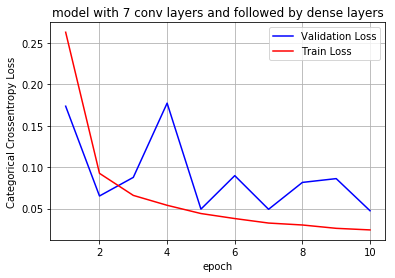

In [28]:
score = model_7layer.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,axis = plt.subplots(1,1)
axis.set_title("model with 7 conv layers and followed by dense layers")
axis.set_xlabel('epoch') ; axis.set_ylabel('Categorical Crossentropy Loss')
plt_epoch_vs_loss(list(range(1,11)), history.history['val_loss'], history.history['loss'], axis)
table.add_row(["model_7convlayer",score[1],"kernel-7X7X4(relu, he_normal),\n BatchNormalization(),\n MaxPool-(2,2)\
kernel-5X5X8(padding-same, relu, he_normal),\n \
kernel-5X5X16(padding-same, relu, he_normal),\n MaxPool-(2,2),\n \
kernel-3X3X32(padding-same, relu, he_normal),\n \
kernel-3X3X64(padding-same, relu, he_normal),\n MaxPool-(2,2),\n \
kernel-1X1X128(padding-same, relu, he_normal),\n \
kernel-1X1X256(padding-same, relu, he_normal),\n \
flatten,\n  Dense-512(relu, he_normal),\n BatchNormalization(),\n Dropout-0.4,\n Dense-128(relu, he_normal),\n BatchNormalization(),\n Dropout-0.2,\n softmax-10"])

In [29]:
print(table)

+------------------+---------------+----------------------------------------------------------------------+
|    model_name    | Test Accuracy |                             Description                              |
+------------------+---------------+----------------------------------------------------------------------+
| model_3convlayer |     0.9567    |                    kernel-5X5X3(relu, he_normal),                    |
|                  |               |                            maxpool-(2,2),                            |
|                  |               |                    kernel-3X3X3(relu, he_normal),                    |
|                  |               |                            maxpool-(2,2),                            |
|                  |               |                    kernel-2X2X3(relu, he_normal),                    |
|                  |               |                               flatten,                               |
|                  |        